In [20]:
# Import the necessary libraries for our code
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes

# How to install geopandas https://www.hatarilabs.com/ih-en/how-to-install-python-geopandas-on-anaconda-in-windows-tutorial
# First you need to know your python version before installing "GDAL, Pyproj, Fiona, Shapely and Geopandas" 
# Use "python --version" to know your version, and Windows properties to know if you are running on a 64 or 32bit os
# In my case my Python version was Python 3.7.1 so I installaled GDAL-3.1.4-cp37-cp37m-win_amd64 "CP37 is python 3.7"

import geopandas as gpd
from shapely.geometry import Point,Polygon


%matplotlib inline

# To see all columns in a DataFrame
pd.options.display.max_columns = None

# To see all column content
pd.options.display.width = 0
pd.set_option('display.max_rows', 500)


In [31]:
location  = "E:/Alfayoum University/COVID-19 Project/Sources"

In [204]:
population_map = gpd.read_file(location +'/hotosm_egy_populated_places_points_shp/hotosm_egy_populated_places_points.shp')

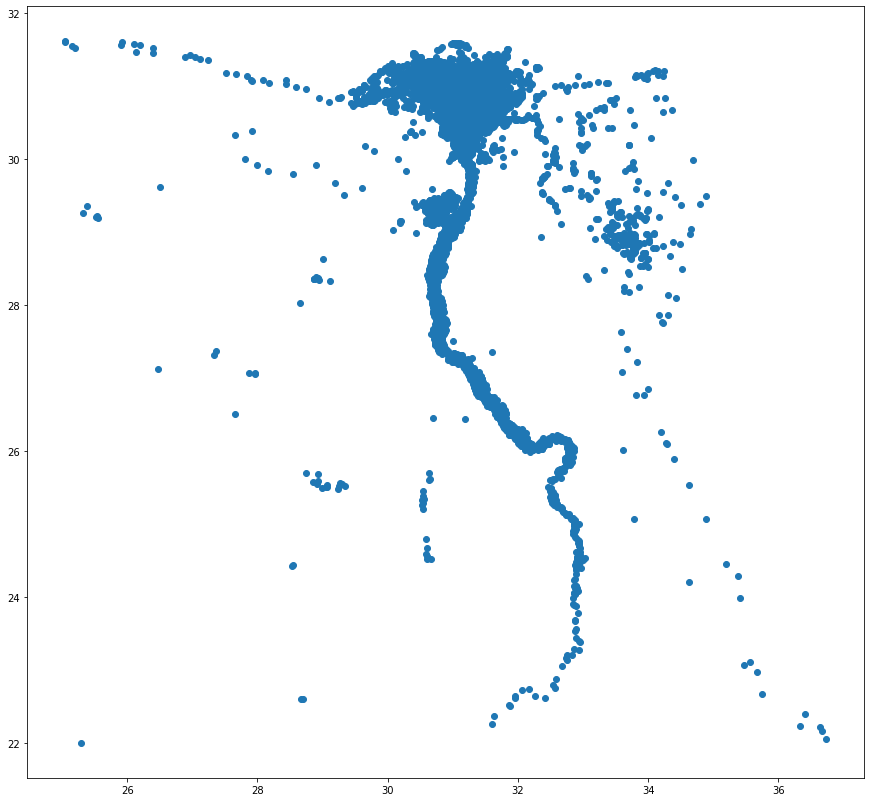

In [205]:
fx,ax = plt.subplots(figsize= (15,55))
population_map.plot(ax =ax)

In [287]:
Hospitals = pd.read_csv(location+'/Hospitals/Hospitals.csv')


In [288]:
Hospitals.head()
#population.head()

,X,Y,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type
0,31.331793,30.083173,1373306818,node,12,NaN,pharmacy,NaN,NaN,NaN,NaN,12673825.0,NaN,NaN,NaN,952bd661efc14cd7b6b246128aaf7c74,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2012/08/09 21:00:56,NaN,NaN,NaN,حنا,NaN,FidelCastro,NaN,NaN,NaN,yes,NaN,NaN
1,31.247019,30.044783,4475957330,node,12,NaN,pharmacy,NaN,NaN,NaN,NaN,43339378.0,NaN,NaN,NaN,f8b4b1cd784d457cbce960224ec7ac38,NaN,Mo-Su 09:30-21:30,NaN,NaN,NaN,NaN,1.0,NaN,2016/11/01 22:50:21,NaN,NaN,NaN,فضل,NaN,Shahenaz El Tair,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,48980479,way,12,NaN,hospital,NaN,NaN,NaN,NaN,82541718.0,NaN,NaN,NaN,5f967db5708c47f6b8349aa54984bbc6,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2020/03/23 21:28:53,NaN,NaN,NaN,مستشفى العجوزة,NaN,Kalepom,NaN,NaN,NaN,NaN,hospital,NaN
3,29.800819,31.018724,5026583221,node,9,NaN,pharmacy,NaN,NaN,NaN,NaN,51003817.0,NaN,NaN,NaN,6a2c08919e124a82a813161f50069af4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2017/08/10 14:41:21,NaN,NaN,NaN,صيدلية العامرية,NaN,Mahmoud AboTalep,NaN,NaN,NaN,NaN,NaN,NaN
4,32.053870,26.274331,4575983511,node,9,NaN,doctors,NaN,NaN,NaN,NaN,44716692.0,NaN,NaN,NaN,23363dd3b7184e3f817fc0c01c0488a2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2016/12/27 21:47:45,NaN,NaN,NaN,D Elia sabet,NaN,Adel Nassar,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
#Data Cleansing and Data Wranglering

Hospitals.drop(columns =['osm_id' , 'osm_type' , 'completeness','is_in_health_zone','speciality','operator','water_source',
                         'changeset_id','insurance','contact_number','uuid','electricity','opening_hours','operational_status','source',
                          'is_in_health_area','health_amenity_type','changeset_version','emergency','changeset_timestamp','addr_housenumber','addr_postcode',
                          'changeset_user','wheelchair','url','dispensing','operator_type','addr_street','addr_city','healthcare','staff_doctors','staff_nurses','beds'
                         ], inplace = True) 


In [290]:
Hospitals.head()

,X,Y,amenity,name
0,31.331793,30.083173,pharmacy,حنا
1,31.247019,30.044783,pharmacy,فضل
2,NaN,NaN,hospital,مستشفى العجوزة
3,29.800819,31.018724,pharmacy,صيدلية العامرية
4,32.053870,26.274331,doctors,D Elia sabet


In [291]:
Hospitals.describe()

,X,Y
count,973.000000,973.000000
mean,31.551560,29.107682
std,1.263016,2.110540
min,25.159202,24.082959
25%,31.088949,27.191093
50%,31.328312,30.039738
75%,31.821073,30.780721
max,35.411109,31.560884


In [292]:
# Remove coordinates with wrong values
Hospitals = Hospitals[Hospitals['X'].notna()]
Hospitals = Hospitals[Hospitals['Y'].notna()]
Hospitals = Hospitals[Hospitals.X != 0]
Hospitals = Hospitals[Hospitals.Y != 0]



In [293]:
Hospitals.head()

,X,Y,amenity,name
0,31.331793,30.083173,pharmacy,حنا
1,31.247019,30.044783,pharmacy,فضل
3,29.800819,31.018724,pharmacy,صيدلية العامرية
4,32.053870,26.274331,doctors,D Elia sabet
5,31.826542,31.500728,hospital,مستشفي الدلتا


In [294]:
Hospitals.amenity.unique()

array(['pharmacy', 'doctors', 'hospital', 'clinic', 'dentist'],
      dtype=object)

In [295]:
Hospitals[Hospitals.amenity.isin(['pharmacy','hospital'])][:5]

,X,Y,amenity,name
0,31.331793,30.083173,pharmacy,حنا
1,31.247019,30.044783,pharmacy,فضل
3,29.800819,31.018724,pharmacy,صيدلية العامرية
5,31.826542,31.500728,hospital,مستشفي الدلتا
9,31.224958,30.020582,pharmacy,ايهاب سمير


In [296]:
Hospitals = Hospitals[Hospitals.amenity.isin(['pharmacy','hospital'])]


In [297]:
Hospitals.amenity.unique()

array(['pharmacy', 'hospital'], dtype=object)

In [298]:
Hospitals


,X,Y,amenity,name
0,31.331793,30.083173,pharmacy,حنا
1,31.247019,30.044783,pharmacy,فضل
3,29.800819,31.018724,pharmacy,صيدلية العامرية
5,31.826542,31.500728,hospital,مستشفي الدلتا
9,31.224958,30.020582,pharmacy,ايهاب سمير
...,...,...,...,...
1173,31.342423,30.110056,pharmacy,صيدلية جون عدلى
1174,31.216838,30.043283,hospital,العيون الدولي
1175,31.267468,29.953998,pharmacy,Alaa Pharmacy
1176,31.457497,30.884448,hospital,Makka Hospital


In [299]:
# Create random number test for the available beds
import numpy as np
np.random.randint(1, 30, Hospitals.shape[0])


array([15,  3, 20, 17, 29,  3, 21,  2, 14, 15, 15,  2, 20,  9, 14, 29, 21,
       28, 10,  8,  4,  5,  3, 11, 11,  3, 16, 29, 21, 21, 20, 25,  8, 24,
       11, 13, 29, 20, 21, 20, 14, 14, 20, 25,  7, 19, 14, 26, 28, 28,  4,
       18,  5, 22, 14,  8, 13,  7,  6, 20, 13, 18, 13, 28,  8, 11, 21, 12,
       26, 14, 16, 16, 18, 16, 14,  8, 16, 18,  1, 27, 14, 29, 16, 14, 14,
       29, 14,  1, 19, 18,  8, 26, 29,  3, 21,  2, 17, 17, 25,  6, 26, 11,
        4, 27, 24, 12, 14, 28, 19, 29, 11,  5, 23, 12, 24, 25, 10, 16, 16,
       14, 13, 25, 14, 13, 13, 13, 20, 27, 14,  1,  8, 15, 14, 12, 10, 11,
       15, 22, 22,  3, 23, 21,  4, 20, 24, 19, 17,  8, 10, 19, 10, 22, 22,
       24, 11, 25, 16,  2, 16,  8, 28, 17, 16, 21,  9,  1,  6,  3,  9, 19,
       25, 22,  7,  3,  3, 24, 19, 21,  7,  2, 29, 17,  7, 13,  1, 25,  2,
        8, 13, 17,  2, 11,  3, 23,  3,  1, 18, 26, 23,  8, 25, 29,  4,  9,
       16, 25, 22, 15, 17, 21,  9, 20, 26, 29, 12, 11, 16, 28,  5, 29, 17,
       19,  6, 23,  8,  9

In [300]:
# Create random number for the available beds in hospitals only
#Hospitals[Hospitals['amenity'] == 'pharmacy']['Available_Beds'] = 0

Hospitals['Available_Beds'] = np.random.randint(1, 30, Hospitals.shape[0])


In [301]:
# Pharmacies should have beds with Zero
Hospitals['Available_Beds'][Hospitals['amenity'] == 'pharmacy']= 0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [302]:
Hospitals

,X,Y,amenity,name,Available_Beds
0,31.331793,30.083173,pharmacy,حنا,0
1,31.247019,30.044783,pharmacy,فضل,0
3,29.800819,31.018724,pharmacy,صيدلية العامرية,0
5,31.826542,31.500728,hospital,مستشفي الدلتا,11
9,31.224958,30.020582,pharmacy,ايهاب سمير,0
...,...,...,...,...,...
1173,31.342423,30.110056,pharmacy,صيدلية جون عدلى,0
1174,31.216838,30.043283,hospital,العيون الدولي,6
1175,31.267468,29.953998,pharmacy,Alaa Pharmacy,0
1176,31.457497,30.884448,hospital,Makka Hospital,18


In [194]:
geometry = [Point(xy) for xy in zip (Hospitals['X'],Hospitals['Y'])]
geometry[:2]

In [ ]:
crs = {'init':'epsg:4326'}

In [197]:
geo_df = gpd.GeoDataFrame(Hospitals,
                          crs = crs,
                         geometry= geometry)



C:\Users\User\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [198]:
geo_df.head()

,X,Y,amenity,name,Available_Beds,geometry
0,31.331793,30.083173,pharmacy,حنا,0,POINT (31.33179 30.08317)
1,31.247019,30.044783,pharmacy,فضل,0,POINT (31.24702 30.04478)
3,29.800819,31.018724,pharmacy,صيدلية العامرية,0,POINT (29.80082 31.01872)
5,31.826542,31.500728,hospital,مستشفي الدلتا,26,POINT (31.82654 31.50073)
9,31.224958,30.020582,pharmacy,ايهاب سمير,0,POINT (31.22496 30.02058)


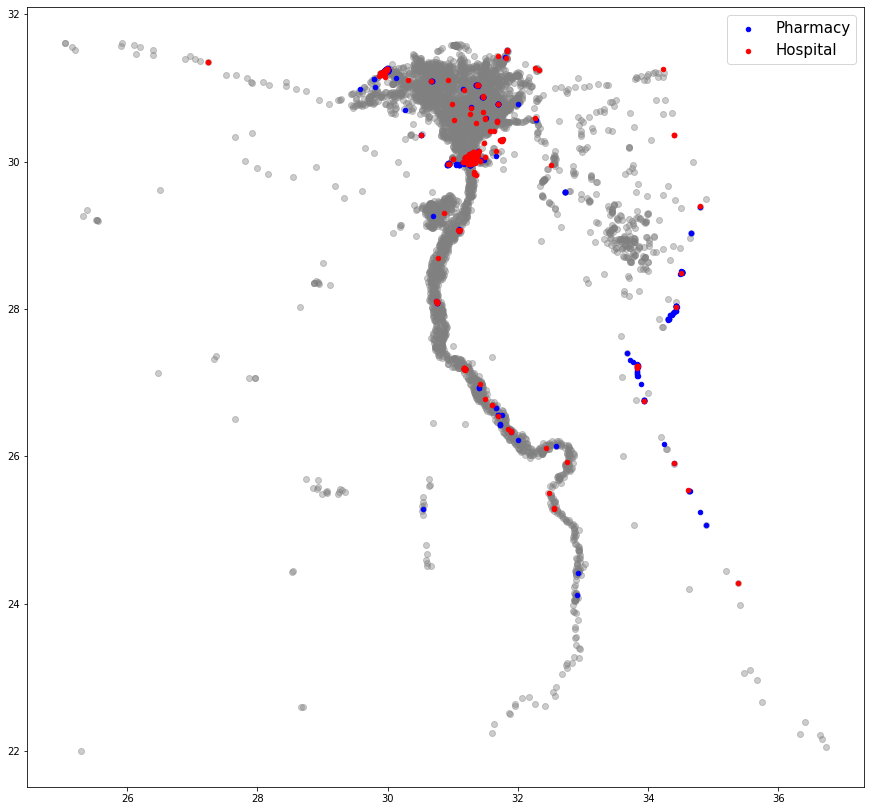

In [215]:
fig,ax = plt.subplots(figsize = (15,15))
population_map.plot (ax = ax, alpha = 0.4 , color="grey" )
geo_df[geo_df["amenity"]=='pharmacy'].plot(ax=ax,markersize=20, color = "blue", marker="o",label="Pharmacy")
geo_df[geo_df["amenity"]=='hospital'].plot(ax=ax,markersize=20, color = "red", marker="o",label="Hospital")
plt.legend(prop={"size":15})


In [43]:
population = pd.read_csv(location+'/Population/population_egy_2018-10-01.csv/population_egy_2018-10-01.csv')


In [46]:
population.head()

,Lat,Lon,Population
0,31.652917,25.148750,5.52666
1,31.640694,25.145139,5.52666
2,31.623472,25.872917,3.64048
3,31.623194,25.924028,3.64048
4,31.622917,25.924028,3.64048


In [218]:
population_map[:5]

,osm_id,source,is_in,population,place,name,geometry
0,27043265.0,None,None,12000,city,دهب,POINT (34.51457 28.49636)
1,27084072.0,None,None,160901,city,الغردقة,POINT (33.83071 27.22256)
2,27133981.0,None,None,15000,town,الجونة‎,POINT (33.67416 27.39893)
3,27135821.0,None,None,1918,city,مرسى علم,POINT (34.89382 25.06999)
4,27136155.0,None,"Red Sea, Egypt",24344,city,القصير,POINT (34.27976 26.10484)


In [270]:
population_map

,osm_id,source,is_in,population,place,name,geometry
0,2.704326e+07,None,None,12000.0,city,دهب,POINT (34.51457 28.49636)
1,2.708407e+07,None,None,160901.0,city,الغردقة,POINT (33.83071 27.22256)
2,2.713398e+07,None,None,15000.0,town,الجونة‎,POINT (33.67416 27.39893)
3,2.713582e+07,None,None,1918.0,city,مرسى علم,POINT (34.89382 25.06999)
4,2.713616e+07,None,"Red Sea, Egypt",24344.0,city,القصير,POINT (34.27976 26.10484)
...,...,...,...,...,...,...,...
4291,7.730424e+09,GNS,None,NaN,hamlet,Ḩalā’ib,POINT (36.63333 22.21667)
4292,7.730428e+09,GNS,None,NaN,hamlet,Bi’r al Ḩaşá,POINT (35.66667 22.96667)
4293,7.730428e+09,GNS,None,NaN,hamlet,Marsá Sha‘b,POINT (35.75000 22.66667)
4294,7.730432e+09,GNS,None,NaN,hamlet,Bi’r Shalatayn,POINT (35.46667 23.06667)


In [271]:
population_map = population_map[population_map['population'].notna()]
population_map = population_map[population_map.population != 0]


In [272]:
population_map

,osm_id,source,is_in,population,place,name,geometry
0,2.704326e+07,None,None,12000.0,city,دهب,POINT (34.51457 28.49636)
1,2.708407e+07,None,None,160901.0,city,الغردقة,POINT (33.83071 27.22256)
2,2.713398e+07,None,None,15000.0,town,الجونة‎,POINT (33.67416 27.39893)
3,2.713582e+07,None,None,1918.0,city,مرسى علم,POINT (34.89382 25.06999)
4,2.713616e+07,None,"Red Sea, Egypt",24344.0,city,القصير,POINT (34.27976 26.10484)
5,2.713625e+07,None,"Red Sea, Egypt",28261.0,city,سفاجا‎‎,POINT (33.93838 26.76333)
6,2.756497e+07,None,"Egypt, جمهورية مصر العربية",488125.0,city,السويس,POINT (32.53709 29.97450)
7,2.756498e+07,None,None,538378.0,city,بورسعيد,POINT (32.30550 31.26324)
8,2.756502e+07,None,None,4546231.0,city,الإسكندرية,POINT (29.89438 31.19900)
9,2.756512e+07,None,None,2681863.0,city,الجيزة,POINT (31.21181 29.98708)


In [273]:
#population_map[population_map.applymap(np.isreal)['population'] == 'True']
#population_map.applymap(np.isreal)['population']
population_map['population'][population_map['population'] == 'ملاحة ابو وحش'] = 0



C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [274]:
population_map["population"] = pd.to_numeric(population_map["population"])



In [275]:
population_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 107 entries, 0 to 4295
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   osm_id      107 non-null    float64 
 1   source      0 non-null      object  
 2   is_in       53 non-null     object  
 3   population  107 non-null    float64 
 4   place       107 non-null    object  
 5   name        107 non-null    object  
 6   geometry    107 non-null    geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 6.7+ KB


In [276]:
population_map.name.unique()

array(['دهب', 'الغردقة', 'الجونة\u200e', 'مرسى علم', 'القصير',
       'سفاجا\u200e\u200e', 'السويس', 'بورسعيد', 'الإسكندرية', 'الجيزة',
       'رأس سدر', 'بنها', 'المنصورة', 'المحلة الكبرى', 'نخل', 'ميت غمر',
       'زفتى', 'القاهرة', 'دمياط', 'شلاتين', 'الزقازيق', 'دمنهور', 'قنا',
       'مدينة السادس من أكتوبر', 'شبين الكوم', 'مرسى مطروح\u200e',
       'الحوامدية', 'دسوق', 'قليوب\u200e', 'أبو كبير\u200e', 'جرجا',
       'السلوم', 'برقش', 'واحة سيوة', 'مدينة الشيخ زايد', 'بنى مزار',
       'نجع حمادي', 'قفـط', 'قوص', 'دراو', 'دكرنس', 'أبو قير',
       'بئر العبد', 'الواحات الخارجة', 'موط', 'بورفؤاد', 'شرم الشيخ',
       'بلبيس', 'العلمين', 'الشيخ زويد', 'المنيا', 'إدفو', 'نقادة',
       'مسطرود', 'بني حسن', 'ملوى', 'الفيوم', 'سنباط', 'الطور',
       'رأس غارب', 'بني سويف', 'شبرا الخيمة', 'الإسماعيلية', 'العريش',
       'أبو صير بنا', 'سمنود', 'مدينة العاشر من رمضان', 'معادي الخبيري',
       'حلوان', 'نويبع', 'طود', 'رشيد', 'Abu Humos City', 'سيدي البراني',
       'إدكو', 'سوهاج\u200e'

In [303]:
Hospitals

,X,Y,amenity,name,Available_Beds
0,31.331793,30.083173,pharmacy,حنا,0
1,31.247019,30.044783,pharmacy,فضل,0
3,29.800819,31.018724,pharmacy,صيدلية العامرية,0
5,31.826542,31.500728,hospital,مستشفي الدلتا,11
9,31.224958,30.020582,pharmacy,ايهاب سمير,0
...,...,...,...,...,...
1173,31.342423,30.110056,pharmacy,صيدلية جون عدلى,0
1174,31.216838,30.043283,hospital,العيون الدولي,6
1175,31.267468,29.953998,pharmacy,Alaa Pharmacy,0
1176,31.457497,30.884448,hospital,Makka Hospital,18


In [312]:
Hospitals = Hospitals.dropna()


In [313]:
Hospitals[Hospitals['amenity'] == 'hospital']

,X,Y,amenity,name,Available_Beds
5,31.826542,31.500728,hospital,مستشفي الدلتا,11
22,31.204039,30.054558,hospital,clean vision laser centre,3
23,31.332480,30.080940,hospital,مركز الدرة التخصصي للعيون,14
24,29.912587,31.195217,hospital,مستشفى زمزم,19
26,29.934817,31.208315,hospital,مستشفى سموحة الدولي,23
30,29.973631,31.247892,hospital,مستشفى لوران,18
33,32.320268,31.244023,hospital,مستشفى بورفواد,18
37,34.511459,28.488384,hospital,مستشفى ذهب الإختصاصي,12
47,34.792617,29.392557,hospital,El Wekala Medical Centre,17
56,31.313996,30.133309,hospital,مستشفى الحق,19


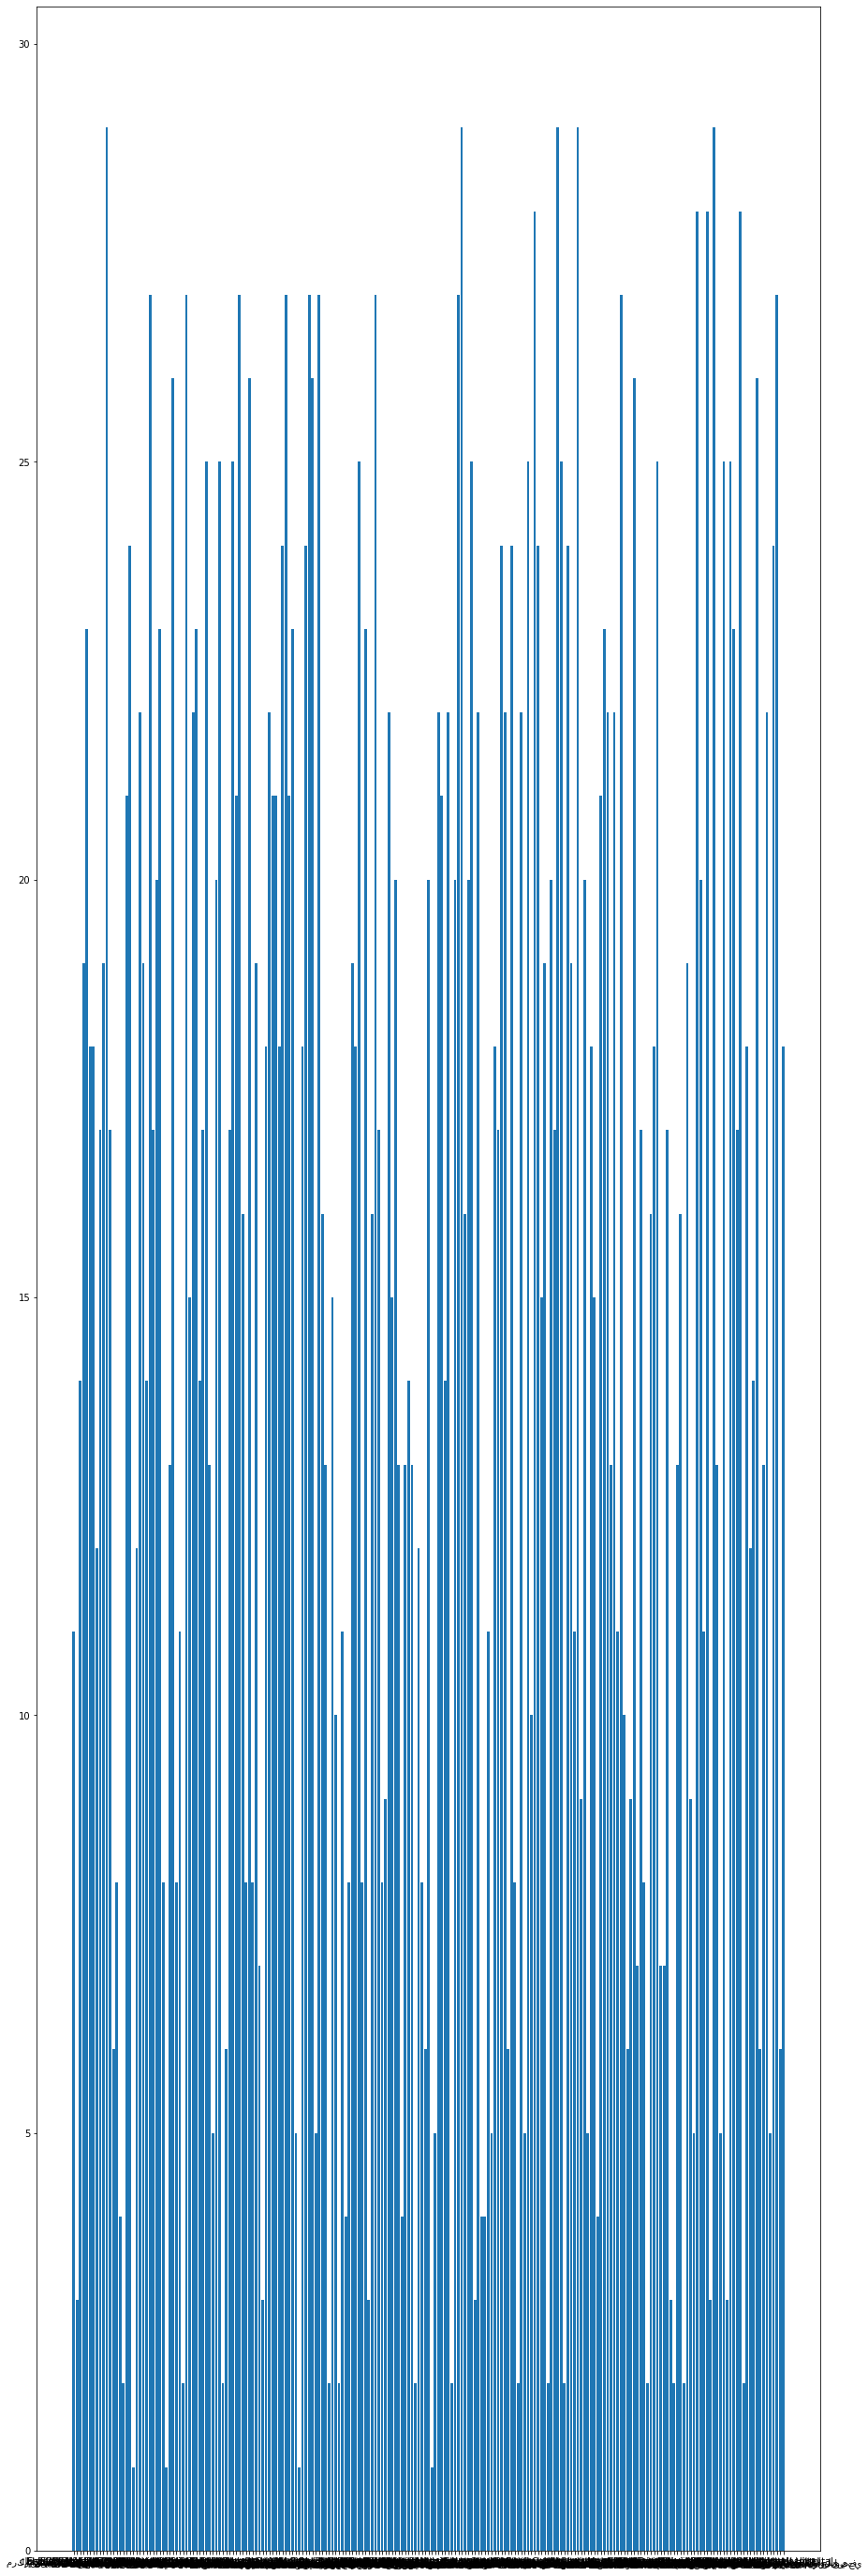

In [317]:
#from matplotlib import pyplot as plt 

fig = plt.figure(figsize =(15, 50)) 

Hospitals[Hospitals['amenity'] == 'hospital']

name = Hospitals[Hospitals['amenity'] == 'hospital']['name']
Beds = Hospitals[Hospitals['amenity'] == 'hospital']['Available_Beds']

# Horizontal Bar Plot 
plt.bar(name, Beds) 
  
# Show Plot 
plt.show() 



In [330]:
Hospitals.sort_values('Available_Beds',ascending=False)




,X,Y,amenity,name,Available_Beds
822,29.933826,31.220941,hospital,مركز الكلى والمسالك البولية - مستشفى اليسر,29
1046,31.000878,30.030250,hospital,Seniors Dental Clinic,29
784,31.277137,30.057973,hospital,مستشفى طلبة البؤث,29
634,31.756649,30.291726,hospital,مستشفى خميس التخصصي,29
57,29.940808,31.225827,hospital,Mostafa Kamel Hospital,29
...,...,...,...,...,...
452,31.334657,30.094735,pharmacy,صيدلية شاتيلا,0
451,29.963467,31.234612,pharmacy,صيدلية هند الطيبي,0
449,31.354069,30.116709,pharmacy,صيدلية عبدالمالك,0
446,31.346815,30.064751,pharmacy,أبو الخير,0


In [342]:
Hospitals.sort_values('Available_Beds',ascending=False)[:10]

,X,Y,amenity,name,Available_Beds
822,29.933826,31.220941,hospital,مركز الكلى والمسالك البولية - مستشفى اليسر,29
1046,31.000878,30.030250,hospital,Seniors Dental Clinic,29
784,31.277137,30.057973,hospital,مستشفى طلبة البؤث,29
634,31.756649,30.291726,hospital,مستشفى خميس التخصصي,29
57,29.940808,31.225827,hospital,Mostafa Kamel Hospital,29
753,35.378582,24.285303,hospital,Diving clinic,28
1039,31.321339,29.859917,hospital,مستشفي الهلال الأحمر المصري,28
1078,31.307752,30.126939,hospital,مستشفى النور المحمدى,28
1033,31.382614,30.093056,hospital,مركز طبي مساكن شيراتون,28
513,29.991768,31.263625,hospital,مستشفى ماري مرقص,27


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


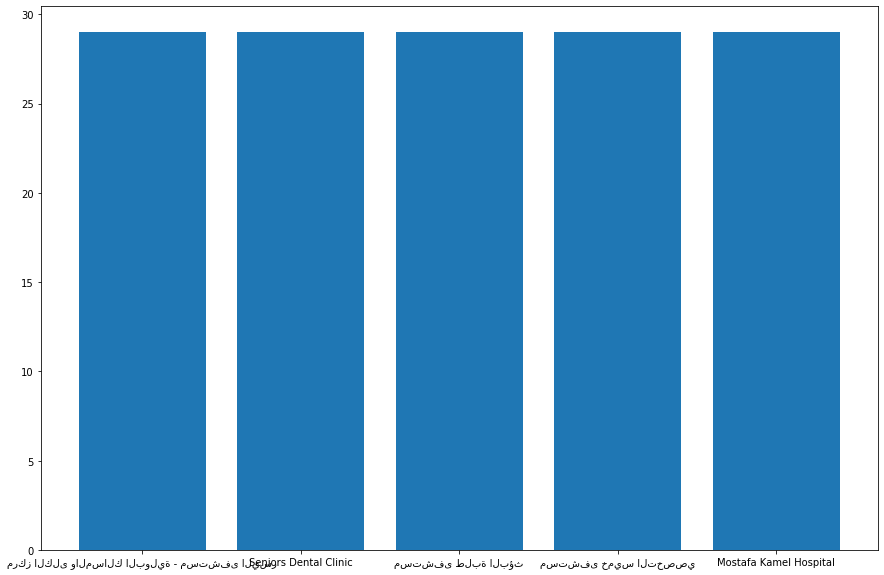

In [343]:


#from matplotlib import pyplot as plt 

fig = plt.figure(figsize =(15, 10)) 




name = Hospitals.sort_values('Available_Beds',ascending=False)[:10][Hospitals['amenity'] == 'hospital']['name'][:5]
Beds = Hospitals.sort_values('Available_Beds',ascending=False)[:10][Hospitals['amenity'] == 'hospital']['Available_Beds'][:5]

# Horizontal Bar Plot 
plt.bar(name, Beds) 
  
# Show Plot 
plt.show() 



In [220]:
geo_df[:5]

,X,Y,amenity,name,Available_Beds,geometry
0,31.331793,30.083173,pharmacy,حنا,0,POINT (31.33179 30.08317)
1,31.247019,30.044783,pharmacy,فضل,0,POINT (31.24702 30.04478)
3,29.800819,31.018724,pharmacy,صيدلية العامرية,0,POINT (29.80082 31.01872)
5,31.826542,31.500728,hospital,مستشفي الدلتا,26,POINT (31.82654 31.50073)
9,31.224958,30.020582,pharmacy,ايهاب سمير,0,POINT (31.22496 30.02058)


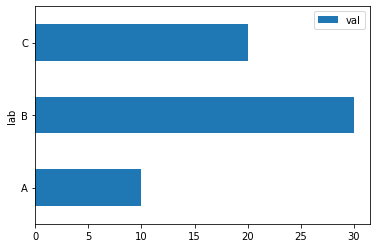

In [318]:
df = pd.DataFrame({'lab': ['A', 'B', 'C'], 'val': [10, 30, 20]})
ax = df.plot.barh(x='lab', y='val')

<Figure size 3600x3600 with 0 Axes>

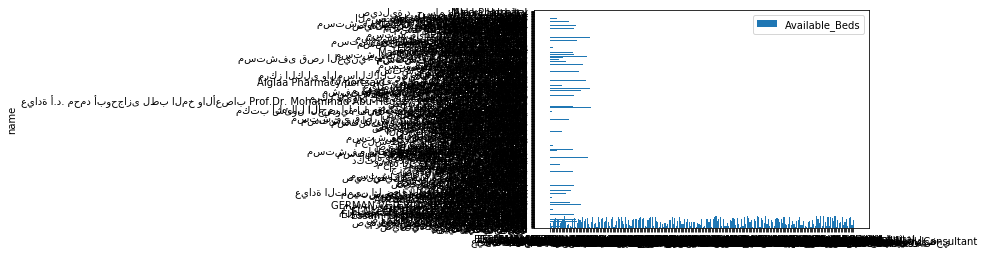

In [327]:
fig = plt.figure(figsize =(50, 50)) 

ax = Hospitals[['name', 'Available_Beds']].plot.barh(x='name', y='Available_Beds')


# Horizontal Bar Plot 
plt.bar(name, Beds) 
  
# Show Plot 
plt.show() 



#name = Hospitals[Hospitals['amenity'] == 'hospital']['name']
#Beds = Hospitals[Hospitals['amenity'] == 'hospital']['Available_Beds']



In [328]:
population_map.describe()

,osm_id,population
count,1.070000e+02,1.070000e+02
mean,1.654048e+09,2.741842e+05
std,2.107186e+09,1.006568e+06
min,2.704326e+07,2.000000e+01
25%,2.995692e+08,1.500000e+04
50%,7.685534e+08,7.041700e+04
75%,2.611540e+09,1.868960e+05
max,7.776621e+09,9.120350e+06


In [344]:
population_map

,osm_id,source,is_in,population,place,name,geometry
0,2.704326e+07,None,None,12000.0,city,دهب,POINT (34.51457 28.49636)
1,2.708407e+07,None,None,160901.0,city,الغردقة,POINT (33.83071 27.22256)
2,2.713398e+07,None,None,15000.0,town,الجونة‎,POINT (33.67416 27.39893)
3,2.713582e+07,None,None,1918.0,city,مرسى علم,POINT (34.89382 25.06999)
4,2.713616e+07,None,"Red Sea, Egypt",24344.0,city,القصير,POINT (34.27976 26.10484)
5,2.713625e+07,None,"Red Sea, Egypt",28261.0,city,سفاجا‎‎,POINT (33.93838 26.76333)
6,2.756497e+07,None,"Egypt, جمهورية مصر العربية",488125.0,city,السويس,POINT (32.53709 29.97450)
7,2.756498e+07,None,None,538378.0,city,بورسعيد,POINT (32.30550 31.26324)
8,2.756502e+07,None,None,4546231.0,city,الإسكندرية,POINT (29.89438 31.19900)
9,2.756512e+07,None,None,2681863.0,city,الجيزة,POINT (31.21181 29.98708)


In [347]:
population_map.sort_values('population',ascending=False)


,osm_id,source,is_in,population,place,name,geometry
26,2.716138e+08,None,"Cairo, Egypt",9120350.0,city,القاهرة,POINT (31.23573 30.04439)
8,2.756502e+07,None,None,4546231.0,city,الإسكندرية,POINT (29.89438 31.19900)
9,2.756512e+07,None,None,2681863.0,city,الجيزة,POINT (31.21181 29.98708)
2065,7.685917e+08,None,"Egypt, جمهورية مصر العربية",1016722.0,city,شبرا الخيمة,POINT (31.24222 30.12860)
3004,7.687756e+08,None,"Egypt, جمهورية مصر العربية",643327.0,town,حلوان,POINT (31.33333 29.85000)
7,2.756498e+07,None,None,538378.0,city,بورسعيد,POINT (32.30550 31.26324)
6,2.756497e+07,None,"Egypt, جمهورية مصر العربية",488125.0,city,السويس,POINT (32.53709 29.97450)
4255,6.379232e+09,None,None,462061.0,city,أسيوط,POINT (31.18538 27.18328)
3660,1.667671e+09,None,"Egypt, جمهورية مصر العربية",451318.0,city,الأقصر,POINT (32.64719 25.70210)
19,3.158245e+07,None,None,431052.0,city,المحلة الكبرى,POINT (31.16830 30.97235)


In [348]:
Hospitals.sort_values('Available_Beds',ascending=False)

,X,Y,amenity,name,Available_Beds
822,29.933826,31.220941,hospital,مركز الكلى والمسالك البولية - مستشفى اليسر,29
1046,31.000878,30.030250,hospital,Seniors Dental Clinic,29
784,31.277137,30.057973,hospital,مستشفى طلبة البؤث,29
634,31.756649,30.291726,hospital,مستشفى خميس التخصصي,29
57,29.940808,31.225827,hospital,Mostafa Kamel Hospital,29
...,...,...,...,...,...
452,31.334657,30.094735,pharmacy,صيدلية شاتيلا,0
451,29.963467,31.234612,pharmacy,صيدلية هند الطيبي,0
449,31.354069,30.116709,pharmacy,صيدلية عبدالمالك,0
446,31.346815,30.064751,pharmacy,أبو الخير,0
